In [1]:
import numpy as np
import copy as cp
import matplotlib as mt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import matplotlib.pyplot as plt
import pyemma.plots as mplt
import pyemma.coordinates as coor
import pyemma
import pickle as pkl
import sklearn as skl
import sklearn.metrics as mtr
import sys
import os
from tqdm import tqdm
sys.path.append('../0_python_modules/')
import navjeet_hist as nh
import extras

In [2]:
randoms = np.loadtxt('../1_datasets/randoms.txt', dtype=int)
t4l_weights = np.loadtxt(f'traj_specific_data/distances0.xvg', comments=['@','#'], usecols=[3])
t4l_weights = np.where(t4l_weights<0.6)[0].shape[0]/t4l_weights.shape[0]
t4l_weights

0.06585091371181798

In [3]:
t4l_impure = 0.44

/tmp/ipykernel_883870/2713904884.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmaps = mt.cm.get_cmap('Reds')


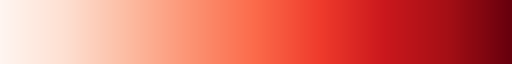

In [4]:
cmaps = mt.cm.get_cmap('Reds')
cmaps

## datasizes

In [5]:
sizes = np.arange(0.1, 1.1, 0.1)
hdatasize = [ [ [ np.load(f'saved_data_size_pmt/tlag700/hist_s{s}_{h}_{i}.npy') for s in range(1,11) ]
                 for i in range(len(randoms))] for h in range(2,11) ]

In [6]:
t=0

cdatasize = [
    [
        [ nh.classification_extent( hdatasize[h][i][s][t], cutoff=0.1, strategy='weighted',
                                  output_type='jm', operation=2, jm_lower=t4l_weights, jm_impure=t4l_impure)
        for s in range(10)]
    for i in range(5)]
for h in range(9)]

cdatasize = np.mean(cdatasize, axis=1), np.std(cdatasize, axis=1)

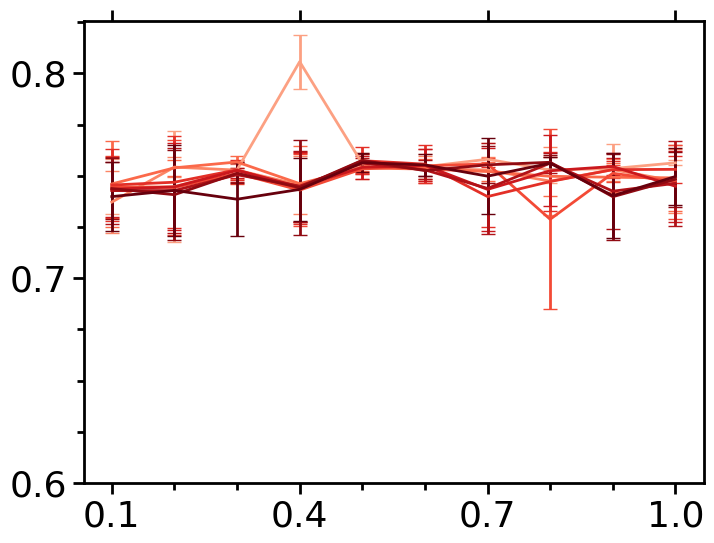

In [7]:
fig,ax=plt.subplots(figsize=(8,6))
for h in range(2,11):
    ax.errorbar(sizes, cdatasize[0][h-2], yerr=cdatasize[1][h-2], 
                c=cmaps((h+2)/(10+2)), lw=2, capsize=5)
ax.set_yticks([0.6,0.7,0.8])
ax.set_xticks([0.1,0.4,0.7,1])
ax.spines[:].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(labelsize=26, length=8, width=2, top=True)
ax.tick_params(which='minor', length=5, width=2)
plt.savefig(f'plots/dsize.pdf')
plt.show()

## synthetic data

In [8]:
t=0
cspermute = [
    [ nh.classification_extent( np.load(f'saved_furf/tlags/hist_{h}_{i}_700.npy')[t], cutoff=0.1, 
                               strategy='weighted', output_type='jm', operation=2,
                              jm_lower=t4l_weights, jm_impure=t4l_impure)
     for i in range(len(randoms)) ]
for h in range(2,11)]

cspermute = np.mean(cspermute, axis=1), np.std(cspermute, axis=1)

In [9]:
t=0
csmarginal = [
    [ nh.classification_extent( np.load(f'saved_synthetic_marginal/tlag700/hist_{h}_{i}.npy')[t], cutoff=0.1, 
                               strategy='weighted', output_type='jm', operation=2,
                              jm_lower=t4l_weights, jm_impure=t4l_impure)
     for i in range(len(randoms)) ]
for h in range(2,11)]

csmarginal = np.mean(csmarginal, axis=1), np.std(csmarginal, axis=1)

In [10]:
t=0
csrandom = [
    [ nh.classification_extent( np.load(f'saved_synthetic_random/tlag700/hist_{h}_{i}.npy')[t], cutoff=0.1, 
                               strategy='weighted', output_type='jm', operation=2,
                              jm_lower=t4l_weights, jm_impure=t4l_impure)
     for i in range(len(randoms)) ]
for h in range(2,11)]

csrandom = np.mean(csrandom, axis=1), np.std(csrandom, axis=1)

In [11]:
t=0
csnonsense = [
    [ nh.classification_extent( np.load(f'saved_synthetic_nonsense/tlag700/hist_{h}_{i}.npy')[t], cutoff=0.1, 
                               strategy='weighted', output_type='jm', operation=2,
                              jm_lower=t4l_weights, jm_impure=t4l_impure)
     for i in range(len(randoms)) ]
for h in range(2,11)]

csnonsense = np.mean(csnonsense, axis=1), np.std(csnonsense, axis=1)

In [4]:
cms = ['Reds', 'Purples', 'Greens', 'Greys']
cms = [mt.cm.get_cmap(cm) for cm in cms]
cms = [mt.colors.LinearSegmentedColormap.from_list('',[cm(0.4),cm(0.8)]) for cm in cms]

/tmp/ipykernel_3069032/2249900947.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cms = [mt.cm.get_cmap(cm) for cm in cms]


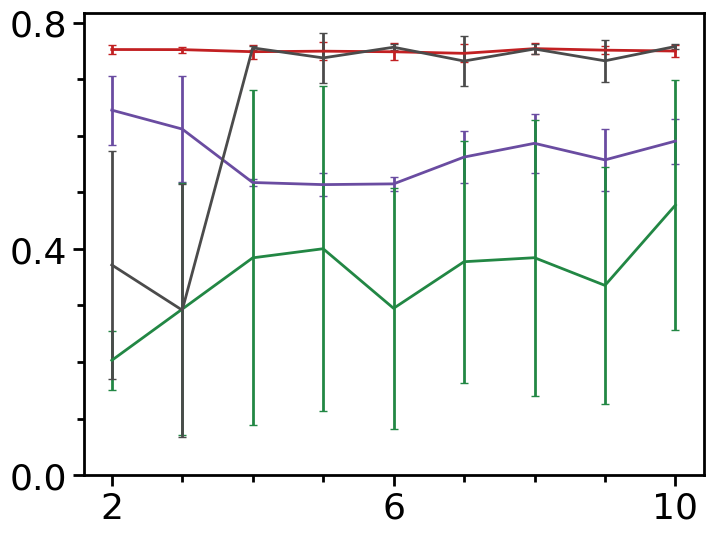

In [46]:
fig,ax=plt.subplots(figsize=(8,6))
for d,data in enumerate([cspermute, csmarginal, csnonsense, csrandom]):
    ax.errorbar(range(2,11), data[0], yerr=data[1], c=cms[d](0.9), capsize=3, lw=2)
ax.set_yticks([0,0.4,0.8])
ax.set_xticks([2,6,10])
ax.spines[:].set_linewidth(2)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(labelsize=26, length=8, width=2)
ax.tick_params(which='minor', length=5, width=2)
plt.savefig(f'plots/synthetic_hlabels.pdf')
plt.show()

In [8]:
np.array(cms[0](0.9))*255

array([194.0745098 ,  31.92941176,  33.6627451 , 255.        ])

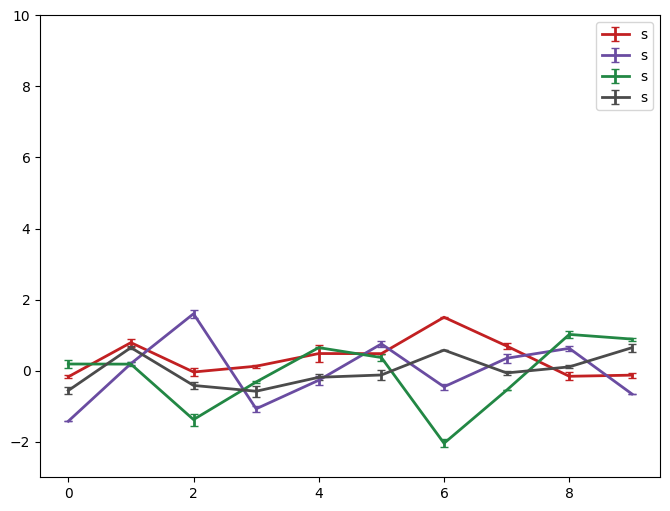

In [19]:
fig,ax=plt.subplots(figsize=(8,6))
for cm in cms:
    ax.errorbar(range(10), np.random.normal(0,1,10), yerr=np.abs(np.random.normal(0,0.1,10)), 
                c=cm(0.9), capsize=3, lw=2, label='s')
plt.ylim(-3,10)
plt.legend()
plt.savefig(f'plots/labels.pdf')
plt.show()

## data clustering

In [5]:
t=0
chc = [
    [
        nh.classification_extent( np.load(f'saved_hc/tlag700/hist_{h}_{i}.npy')[t], 
                                 cutoff=0.1, strategy='weighted', output_type='jm',
                                operation=2, jm_lower=t4l_weights, jm_impure=t4l_impure)
    for i in range(len(randoms))]
for h in range(2,11)]

chc = np.mean(chc, axis=1), np.std(chc, axis=1)

In [6]:
t=0
ckmeans = [
    [
        nh.classification_extent( np.load(f'saved_kmeans/tlag700/hist_{h}_{i}.npy')[t], 
                                 cutoff=0.1, strategy='weighted', output_type='jm',
                                operation=2, jm_lower=t4l_weights, jm_impure=t4l_impure)
    for i in range(len(randoms))]
for h in range(2,11)]

ckmeans = np.mean(ckmeans, axis=1), np.std(ckmeans, axis=1)

In [7]:
t=0
crandom = [
    [
        nh.classification_extent( np.load(f'saved_random/tlag700/hist_{h}_{i}.npy')[t], 
                                 cutoff=0.1, strategy='weighted', output_type='jm',
                                operation=2, jm_lower=t4l_weights, jm_impure=t4l_impure)
    for i in range(len(randoms))]
for h in range(2,11)]

crandom = np.mean(crandom, axis=1), np.std(crandom, axis=1)

In [8]:
t=0
ckmed_direct = [
    [
        nh.classification_extent( np.load(f'saved_kmed_direct/try_2/hist_{h}_{i}.npy')[t], 
                                 cutoff=0.1, strategy='weighted', output_type='jm',
                                operation=2, jm_lower=t4l_weights, jm_impure=t4l_impure)
    for i in range(len(randoms))]
for h in range(2,11)]

ckmed_direct = np.mean(ckmed_direct, axis=1), np.std(ckmed_direct, axis=1)

In [9]:
t=0
ckmed_pmt = [
    [
        nh.classification_extent( np.load(f'saved_kmed_pmt/try_2/hist_{h}_{i}.npy')[t], 
                                 cutoff=0.1, strategy='weighted', output_type='jm',
                                operation=2, jm_lower=t4l_weights, jm_impure=t4l_impure)
    for i in range(len(randoms))]
for h in range(2,11)]

ckmed_pmt = np.mean(ckmed_pmt, axis=1), np.std(ckmed_pmt, axis=1)

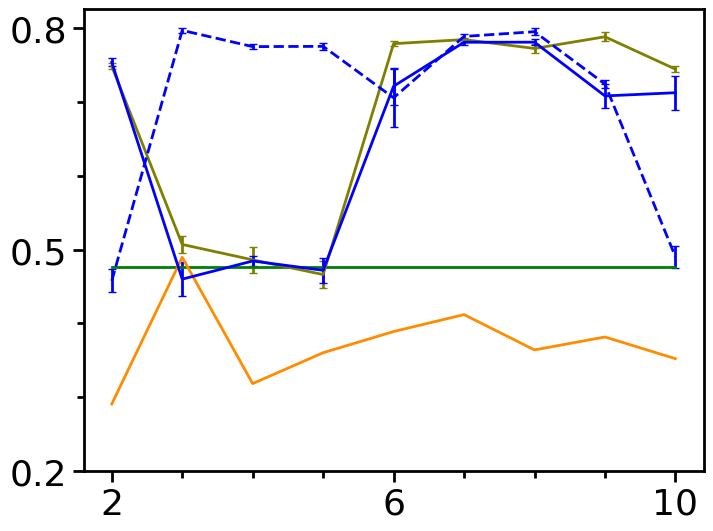

In [19]:
fig,ax=plt.subplots(figsize=(8,6))
ax.errorbar(range(2,11), chc[0], c='green', capsize=3, lw=2)
ax.errorbar(range(2,11), crandom[0], c='darkorange', capsize=3, lw=2)
ax.errorbar(range(2,11), ckmeans[0], yerr=ckmeans[1], c='olive', capsize=3, lw=2)
ax.errorbar(range(2,11), ckmed_direct[0], yerr=ckmed_direct[1], fmt='--', c='blue', capsize=3, lw=2)
ax.errorbar(range(2,11), ckmed_pmt[0], yerr=ckmed_pmt[1], c='blue', capsize=3, lw=2)
# ax.errorbar(range(2,11), cspermute[0], yerr=cspermute[1], c='crimson', capsize=3, lw=4)
ax.set_yticks([0.2,0.5,0.8])
ax.set_xticks([2,6,10])
ax.spines[:].set_linewidth(2)
ax.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(labelsize=26, length=8, width=2)
ax.tick_params(which='minor', length=5, width=2)
plt.savefig(f'plots/clustering.pdf')
plt.show()

In [10]:
chc

(array([0.47683589, 0.47683589, 0.47683589, 0.47683589, 0.47683589,
        0.47683589, 0.47683589, 0.47683589, 0.47683589]),
 array([0.26508604, 0.26508604, 0.26508604, 0.26508604, 0.26508604,
        0.26508604, 0.26508604, 0.26508604, 0.26508604]))

In [14]:
crandom[1].max()

0.1626961324523357

## fimps

### number of fimp required

In [20]:
numbers = np.arange(0.02, 1.01, 0.02)

In [21]:
t=0
cnumbers = [
    [
        [
            nh.classification_extent( np.load(f'saved_fimp/numbers/tlag700/hist_{h}_{r}_{n}.npy')[t],
                                    cutoff=0.1, strategy='weighted', output_type='jm',
                                    operation=2, jm_lower=t4l_weights, jm_impure=t4l_impure )
        for n in range(len(numbers))]
    for r in range(len(randoms))]
for h in range(2,11)]

cnumbers = np.mean(cnumbers, axis=1), np.std(cnumbers, axis=1)

In [22]:
fspermute = [
    [
        np.load(f'saved_furf/fimp_hlabel{h}_{i}.npy')
    for i in range(5)]
for h in range(2,11)]

fspermute = [
    [
        np.cumsum(j[j.argsort()[::-1]])
    for j in i]
for i in fspermute]

fspermute = np.mean(fspermute, axis=1), np.std(fspermute, axis=1)

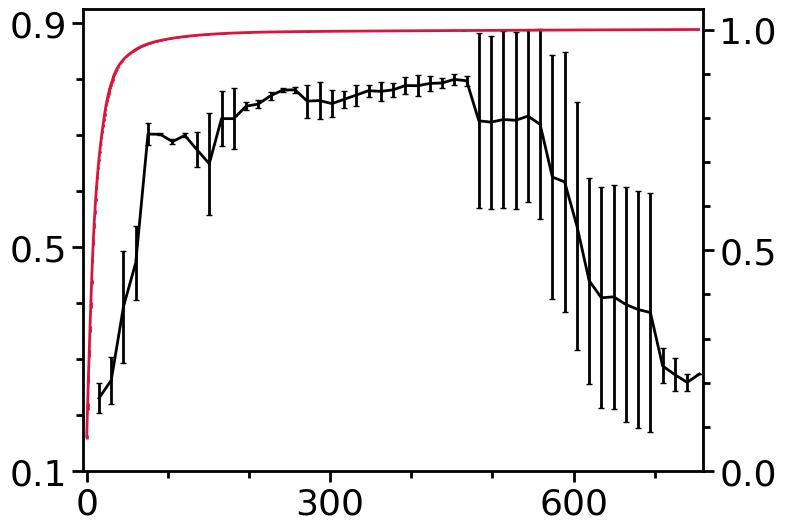

In [48]:
fig,ax=plt.subplots(figsize=(8,6))
bx = ax.twinx()
h=10
ax.errorbar(numbers*755, cnumbers[0][h-2], yerr=cnumbers[1][h-2], 
           c='black', lw=2, capsize=2)
bx.errorbar(range(755), fspermute[0][h-2], yerr=fspermute[1][h-2], lw=2, c='crimson')

ax.set_yticks([0.1,0.5,0.9])
bx.set_yticks([0,0.5,1])
ax.set_xticks([0,300,600])
ax.set_xlim(-4,760)
ax.spines[:].set_linewidth(2)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
bx.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(labelsize=26, length=8, width=2)
bx.tick_params(labelsize=26, length=8, width=2)
ax.tick_params(which='minor', length=5, width=2)
bx.tick_params(which='minor', length=5, width=2)
plt.savefig(f'plots/numbers{h}.pdf')
plt.show()

In [49]:
fsmarginal = [
    [
        np.load(f'saved_synthetic_marginal/fimp_hlabel{h}_{i}.npy')
    for i in range(5)]
for h in range(2,11)]

fsmarginal = [
    [
        np.cumsum(j[j.argsort()[::-1]])
    for j in i]
for i in fsmarginal]

fsmarginal = np.mean(fsmarginal, axis=1), np.std(fsmarginal, axis=1)

In [50]:
fsrandom = [
    [
        np.load(f'saved_synthetic_random/fimp_hlabel{h}_{i}.npy')
    for i in range(5)]
for h in range(2,11)]

fsrandom = [
    [
        np.cumsum(j[j.argsort()[::-1]])
    for j in i]
for i in fsrandom]

fsrandom = np.mean(fsrandom, axis=1), np.std(fsrandom, axis=1)

In [51]:
fsnonsense = [
    [
        np.load(f'saved_synthetic_nonsense/fimp_hlabel{h}_{i}.npy')
    for i in range(5)]
for h in range(2,11)]

fsnonsense = [
    [
        np.cumsum(j[j.argsort()[::-1]])
    for j in i]
for i in fsnonsense]

fsnonsense = np.mean(fsnonsense, axis=1), np.std(fsnonsense, axis=1)

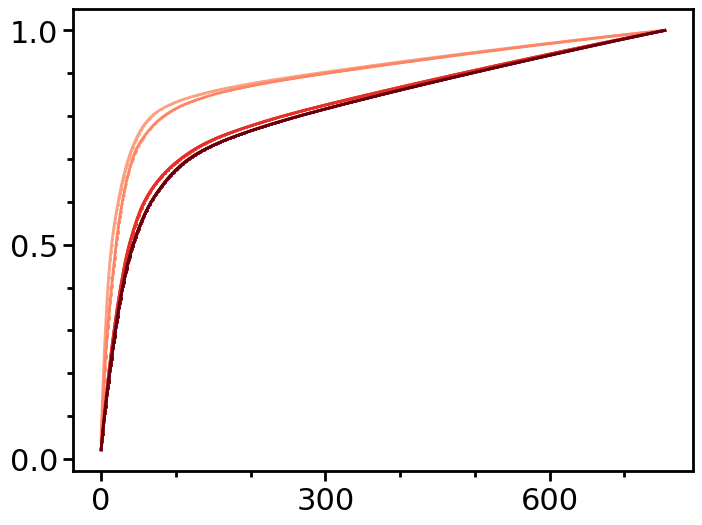

In [49]:
fig,ax=plt.subplots(figsize=(8,6))
for h in range(2,11):
    ax.errorbar(range(755), fsmarginal[0][h-2], yerr=fsmarginal[1][h-2],
               c=cmaps((h+2)/(10+2)), lw=2, )
ax.set_yticks([0,0.5,1])
ax.set_xticks([0,300,600])
ax.spines[:].set_linewidth(2)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(labelsize=22, length=7, width=2)
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/fsmarginal.pdf')
plt.show()

## learning coefficient

In [23]:
s=1
lc = [ ]
lstd = []
for i in ['spermute','smarginal','snonsense','srandom', 'data_size_pmt']:
    ll = np.load(f'saved_lc/lc{s}_{i}.npy') 
    axis = np.where( np.array(ll.shape)==5 )[0][0]
    lc.append( np.mean(ll, axis=axis) )
    lstd.append( np.std(ll, axis=axis) )

In [24]:
lc[0]

array([0.99975687, 0.99972218, 0.99971714, 0.99972913, 0.99972747,
       0.99971412, 0.98988821, 0.98987728, 0.98987953])

In [25]:
lstd[0]

array([4.75961102e-05, 4.46394646e-05, 5.37316924e-05, 5.34536175e-05,
       4.38478631e-05, 4.35397690e-05, 4.48158807e-03, 4.48014235e-03,
       4.47438403e-03])

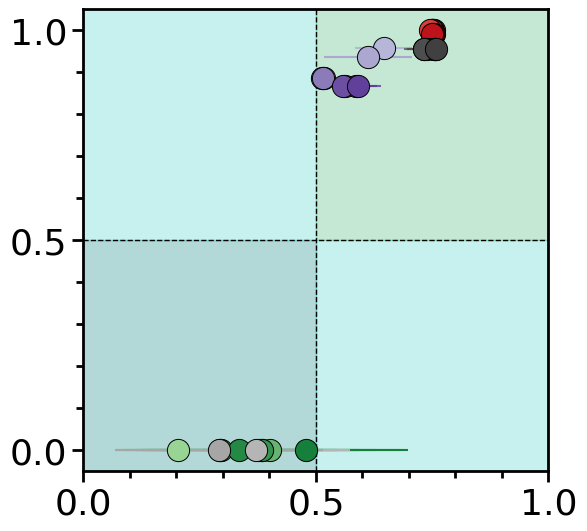

In [58]:
fig,ax=plt.subplots(1,figsize=(6,6))
ax.set_xlim(0,1)
ax.set_ylim(-0.05,1.05)
ax.axvline(0.5,c='black',lw=1, ls='--')
ax.axhline(0.5,c='black',lw=1, ls='--')
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.spines[:].set_linewidth(2)
ax.tick_params(labelsize=26, length=8, width=2)
ax.tick_params(which='minor', length=5, width=2)
#
ax.fill_between([-0.05,0.5],[-0.05,-0.05],[0.5,0.5],color='teal', alpha=0.3)
ax.fill_between([-0.05,0.5],[1.05,1.05],[0.5,0.5],color='mediumturquoise', alpha=0.3)
ax.fill_between([0.5,1.05],[-0.05,-0.05],[0.5,0.5],color='mediumturquoise', alpha=0.3)
ax.fill_between([0.5,1.05],[1.05,1.05],[0.5,0.5],color='mediumseagreen', alpha=0.3)
#
for d,data in enumerate([cspermute, csmarginal, csnonsense, csrandom,]):
    for a in range(9):
        ax.errorbar([data[0][a]], [lc[d][a]], xerr=[data[1][a]], yerr=[lstd[d][a]],
                   c=cms[d](a/8), mec='black', mew=0.7, ms=16, fmt='o')
#
plt.savefig('plots/lc_.pdf')
plt.show()

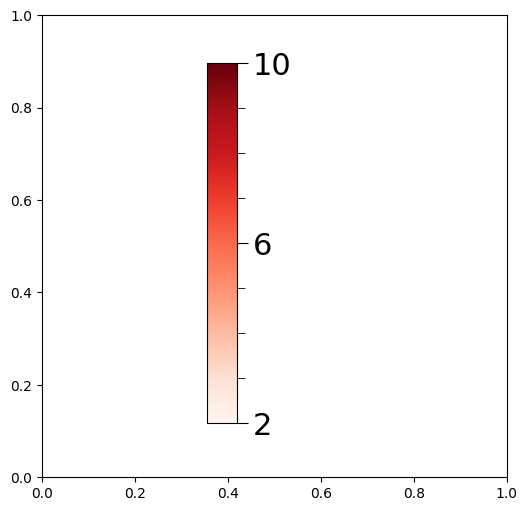

In [79]:
fig,ax=plt.subplots(1,figsize=(6,6))
ax1 = fig.add_axes([0.4,0.2,0.05,0.6])
cb=plt.colorbar(mt.cm.ScalarMappable(norm=mt.colors.Normalize(vmin=2, vmax=10), cmap=cmaps), cax=ax1)
cb.ax.tick_params(labelsize=22, length=8,)
cb.ax.set_yticks([2,6,10])
cb.ax.yaxis.set_minor_locator(AutoMinorLocator(4))
cb.ax.tick_params(which='minor', length=6)
plt.savefig('plots/cb1.pdf')
plt.show()

In [25]:
lc[5].shape

(10, 9)

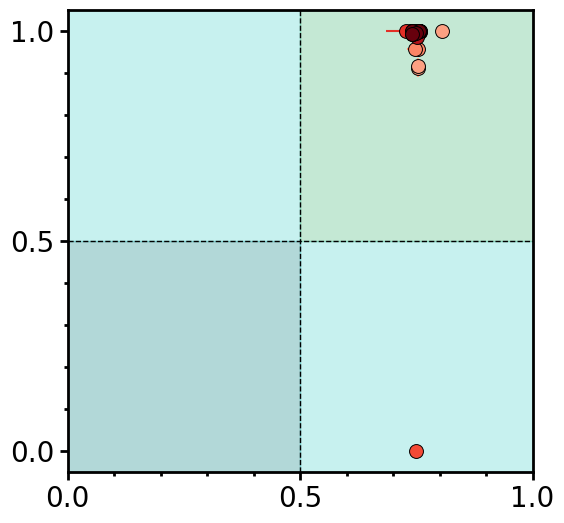

In [56]:
fig,ax=plt.subplots(1,figsize=(6,6))
ax.set_xlim(0,1)
ax.set_ylim(-0.05,1.05)
ax.axvline(0.5,c='black',lw=1, ls='--')
ax.axhline(0.5,c='black',lw=1, ls='--')
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.spines[:].set_linewidth(2)
ax.tick_params(labelsize=20, length=6, width=2)
ax.tick_params(which='minor', length=3, width=2)
#
ax.fill_between([-0.05,0.5],[-0.05,-0.05],[0.5,0.5],color='teal', alpha=0.3)
ax.fill_between([-0.05,0.5],[1.05,1.05],[0.5,0.5],color='mediumturquoise', alpha=0.3)
ax.fill_between([0.5,1.05],[-0.05,-0.05],[0.5,0.5],color='mediumturquoise', alpha=0.3)
ax.fill_between([0.5,1.05],[1.05,1.05],[0.5,0.5],color='mediumseagreen', alpha=0.3)
#
for h in range(2,11):
    ax.errorbar( cdatasize[0].reshape(10,9)[h-2], lc[4][h-2], 
                xerr=cdatasize[1].reshape(10,9)[h-2], 
                yerr=lstd[4][h-2],
                fmt='o', ms=10, c=cmaps((h+2)/(10+2)), mec='black', mew=0.7)
#
plt.savefig('plots/lc_fnumbers.pdf')
plt.show()